# \*\*\[CAM\]\*\*other methods chest xray

SEOYEON CHOI  
2023-10-31

**scorecam nan 값 산출 문제찾는 중..**

# Import

In [1]:
import torch 
from fastai.vision.all import * 
import cv2 as cv
import fastbook
from fastbook import *
from fastai.vision.widgets import *
import os

from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad, EigenGradCAM, LayerCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
import torchvision
from torchvision.models import resnet18
import torch.nn as nn
import matplotlib.pyplot as plt
from PIL import Image
from torchvision.models import resnet50

# Data

refer : https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

In [2]:
# path=Path('./home/Dropbox/chest_xray/chest_xray') 
path = Path(os.path.expanduser(os.path.join('~', 'Dropbox/chest_xray/chest_xray')))

In [3]:
path.ls()

In [4]:
files=get_image_files(path)

In [5]:
dls = ImageDataLoaders.from_folder(path, train='train', valid_pct=0.2, item_tfms=Resize(224))      

In [6]:
dls.vocab

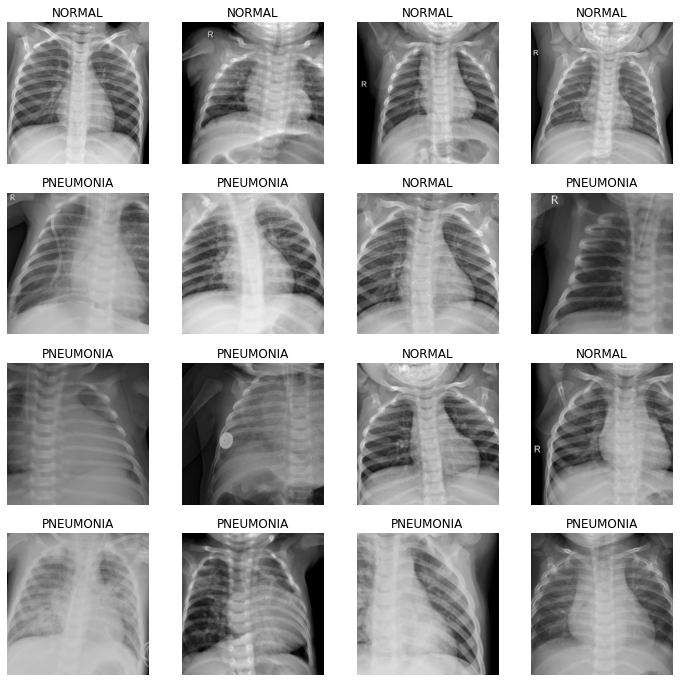

In [7]:
dls.show_batch(max_n=16)

In [8]:
model = resnet34(pretrained=True)

target_layer = [model.layer4[-1]]
gradcam = GradCAM(model=model, target_layers=target_layer)

/home/csy/anaconda3/envs/temp_csy/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/csy/anaconda3/envs/temp_csy/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)

In [9]:
model = resnet34(pretrained=True)

target_layer = [model.layer4[-1]]
hirescam = HiResCAM(model=model, target_layers=target_layer)

In [10]:
model = resnet34(pretrained=True)

target_layer = [model.layer4[-1]]
scorecam = ScoreCAM(model=model, target_layers=target_layer)

In [11]:
model = resnet34(pretrained=True)

target_layer = [model.layer4[-1]]
gradcamplusplus = GradCAMPlusPlus(model=model, target_layers=target_layer)

In [12]:
model = resnet34(pretrained=True)

target_layer = [model.layer4[-1]]
ablationcam = AblationCAM(model=model, target_layers=target_layer)

In [13]:
model = resnet34(pretrained=True)

target_layer = [model.layer4[-1]]
xgradcam = XGradCAM(model=model, target_layers=target_layer)

In [14]:
model = resnet34(pretrained=True)

target_layer = [model.layer4[-1]]
eigencam = EigenCAM(model=model, target_layers=target_layer)

In [15]:
model = resnet34(pretrained=True)

target_layer = [model.layer4[-1]]
fullgrad = FullGrad(model=model, target_layers=target_layer)

In [16]:
model = resnet34(pretrained=True)

target_layer = [model.layer4[-1]]
eigengradcam = EigenGradCAM(model=model, target_layers=target_layer)

In [17]:
model = resnet34(pretrained=True)

target_layer = [model.layer4[-1]]
layercam = LayerCAM(model=model, target_layers=target_layer)

# 1번째 시도

In [18]:
img = PILImage.create(get_image_files(path)[304])

In [19]:
x, = first(dls.test_dl([img]))  #이미지 텐서화
x = x.to('cpu')

In [20]:
cam_gradcam = gradcam(input_tensor=x,targets=None)

In [21]:
cam_hirescam = hirescam(input_tensor=x,targets=None)

In [22]:
cam_scorecam = scorecam(input_tensor=x,targets=None)

100%|██████████| 32/32 [00:03<00:00,  9.20it/s]

In [23]:
cam_gradcamplusplus = gradcamplusplus(input_tensor=x,targets=None)

In [24]:
cam_ablationcam = ablationcam(input_tensor=x,targets=None)

100%|██████████| 16/16 [00:03<00:00,  4.14it/s]

In [25]:
cam_xgradcam = xgradcam(input_tensor=x,targets=None)

In [26]:
cam_eigencam = eigencam(input_tensor=x,targets=None)

In [27]:
cam_fullgrad = fullgrad(input_tensor=x,targets=None)

In [28]:
cam_eigengradcam = eigengradcam(input_tensor=x,targets=None)

In [29]:
cam_layercam = layercam(input_tensor=x,targets=None)

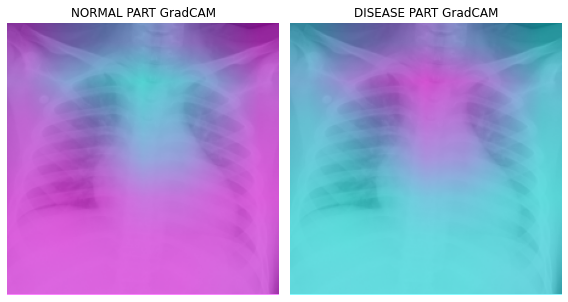

In [30]:
fig, (ax1,ax2) = plt.subplots(1,2) 
dls.train.decode((x,))[0].squeeze().show(ax=ax1)
ax1.imshow(-cam_gradcam.squeeze(),alpha=0.5,extent=(0,224,224,0),interpolation='bilinear',cmap='cool')
ax1.set_title("NORMAL PART GradCAM")
#
dls.train.decode((x,))[0].squeeze().show(ax=ax2)
ax2.imshow(cam_gradcam.squeeze(),alpha=0.5,extent=(0,224,224,0),interpolation='bilinear',cmap='cool')
ax2.set_title("DISEASE PART GradCAM")
#
fig.set_figwidth(8)            
fig.set_figheight(8)
fig.tight_layout()

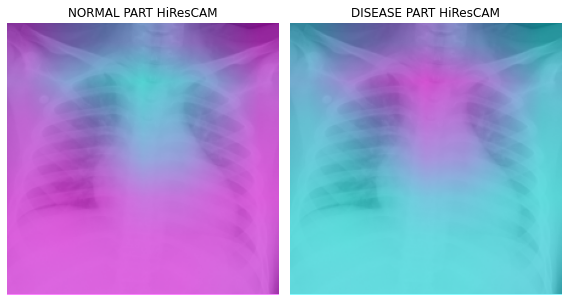

In [31]:
fig, (ax1,ax2) = plt.subplots(1,2) 
dls.train.decode((x,))[0].squeeze().show(ax=ax1)
ax1.imshow(-cam_hirescam.squeeze(),alpha=0.5,extent=(0,224,224,0),interpolation='bilinear',cmap='cool')
ax1.set_title("NORMAL PART HiResCAM")
#
dls.train.decode((x,))[0].squeeze().show(ax=ax2)
ax2.imshow(cam_hirescam.squeeze(),alpha=0.5,extent=(0,224,224,0),interpolation='bilinear',cmap='cool')
ax2.set_title("DISEASE PART HiResCAM")
#
fig.set_figwidth(8)            
fig.set_figheight(8)
fig.tight_layout()

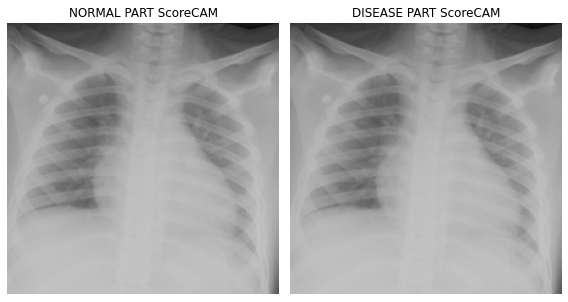

In [32]:
fig, (ax1,ax2) = plt.subplots(1,2) 
dls.train.decode((x,))[0].squeeze().show(ax=ax1)
ax1.imshow(-cam_scorecam.squeeze(),alpha=0.5,extent=(0,224,224,0),interpolation='bilinear',cmap='cool')
ax1.set_title("NORMAL PART ScoreCAM")
#
dls.train.decode((x,))[0].squeeze().show(ax=ax2)
ax2.imshow(cam_scorecam.squeeze(),alpha=0.5,extent=(0,224,224,0),interpolation='bilinear',cmap='cool')
ax2.set_title("DISEASE PART ScoreCAM")
#
fig.set_figwidth(8)            
fig.set_figheight(8)
fig.tight_layout()

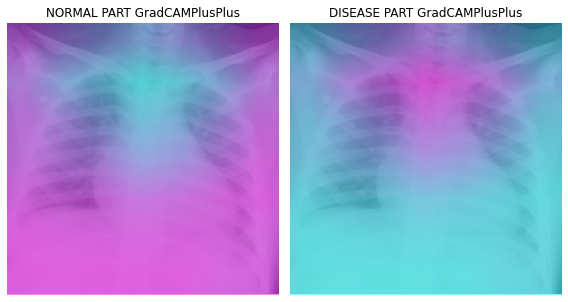

In [33]:
fig, (ax1,ax2) = plt.subplots(1,2) 
dls.train.decode((x,))[0].squeeze().show(ax=ax1)
ax1.imshow(-cam_gradcamplusplus.squeeze(),alpha=0.5,extent=(0,224,224,0),interpolation='bilinear',cmap='cool')
ax1.set_title("NORMAL PART GradCAMPlusPlus")
#
dls.train.decode((x,))[0].squeeze().show(ax=ax2)
ax2.imshow(cam_gradcamplusplus.squeeze(),alpha=0.5,extent=(0,224,224,0),interpolation='bilinear',cmap='cool')
ax2.set_title("DISEASE PART GradCAMPlusPlus")
#
fig.set_figwidth(8)            
fig.set_figheight(8)
fig.tight_layout()

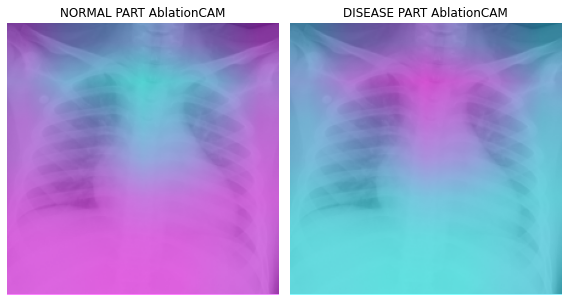

In [34]:
fig, (ax1,ax2) = plt.subplots(1,2) 
dls.train.decode((x,))[0].squeeze().show(ax=ax1)
ax1.imshow(-cam_ablationcam.squeeze(),alpha=0.5,extent=(0,224,224,0),interpolation='bilinear',cmap='cool')
ax1.set_title("NORMAL PART AblationCAM")
#
dls.train.decode((x,))[0].squeeze().show(ax=ax2)
ax2.imshow(cam_ablationcam.squeeze(),alpha=0.5,extent=(0,224,224,0),interpolation='bilinear',cmap='cool')
ax2.set_title("DISEASE PART AblationCAM")
#
fig.set_figwidth(8)            
fig.set_figheight(8)
fig.tight_layout()

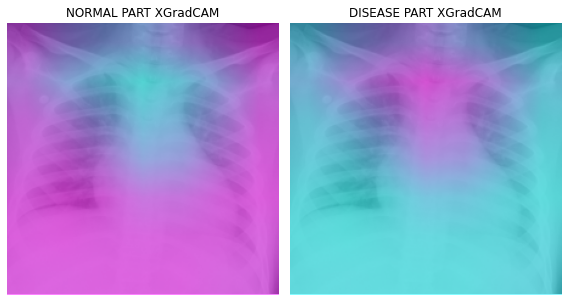

In [35]:
fig, (ax1,ax2) = plt.subplots(1,2) 
dls.train.decode((x,))[0].squeeze().show(ax=ax1)
ax1.imshow(-cam_xgradcam.squeeze(),alpha=0.5,extent=(0,224,224,0),interpolation='bilinear',cmap='cool')
ax1.set_title("NORMAL PART XGradCAM")
#
dls.train.decode((x,))[0].squeeze().show(ax=ax2)
ax2.imshow(cam_xgradcam.squeeze(),alpha=0.5,extent=(0,224,224,0),interpolation='bilinear',cmap='cool')
ax2.set_title("DISEASE PART XGradCAM")
#
fig.set_figwidth(8)            
fig.set_figheight(8)
fig.tight_layout()

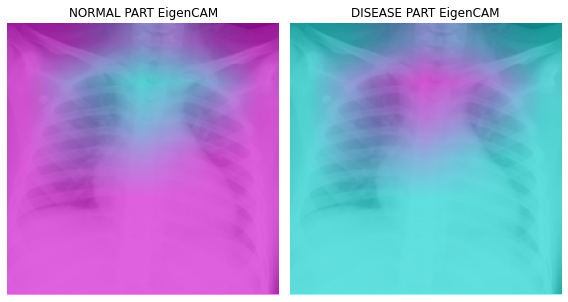

In [36]:
fig, (ax1,ax2) = plt.subplots(1,2) 
dls.train.decode((x,))[0].squeeze().show(ax=ax1)
ax1.imshow(-cam_eigencam.squeeze(),alpha=0.5,extent=(0,224,224,0),interpolation='bilinear',cmap='cool')
ax1.set_title("NORMAL PART EigenCAM")
#
dls.train.decode((x,))[0].squeeze().show(ax=ax2)
ax2.imshow(cam_eigencam.squeeze(),alpha=0.5,extent=(0,224,224,0),interpolation='bilinear',cmap='cool')
ax2.set_title("DISEASE PART EigenCAM")
#
fig.set_figwidth(8)            
fig.set_figheight(8)
fig.tight_layout()

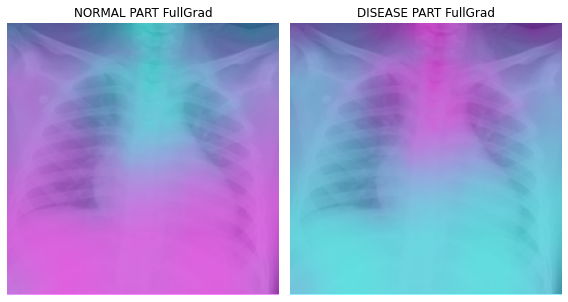

In [37]:
fig, (ax1,ax2) = plt.subplots(1,2) 
dls.train.decode((x,))[0].squeeze().show(ax=ax1)
ax1.imshow(-cam_fullgrad.squeeze(),alpha=0.5,extent=(0,224,224,0),interpolation='bilinear',cmap='cool')
ax1.set_title("NORMAL PART FullGrad")
#
dls.train.decode((x,))[0].squeeze().show(ax=ax2)
ax2.imshow(cam_fullgrad.squeeze(),alpha=0.5,extent=(0,224,224,0),interpolation='bilinear',cmap='cool')
ax2.set_title("DISEASE PART FullGrad")
#
fig.set_figwidth(8)            
fig.set_figheight(8)
fig.tight_layout()

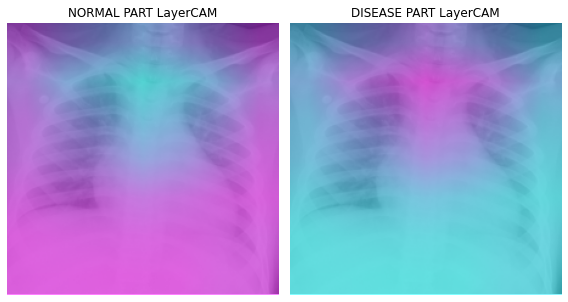

In [38]:
fig, (ax1,ax2) = plt.subplots(1,2) 
dls.train.decode((x,))[0].squeeze().show(ax=ax1)
ax1.imshow(-cam_layercam.squeeze(),alpha=0.5,extent=(0,224,224,0),interpolation='bilinear',cmap='cool')
ax1.set_title("NORMAL PART LayerCAM")
#
dls.train.decode((x,))[0].squeeze().show(ax=ax2)
ax2.imshow(cam_layercam.squeeze(),alpha=0.5,extent=(0,224,224,0),interpolation='bilinear',cmap='cool')
ax2.set_title("DISEASE PART LayerCAM")
#
fig.set_figwidth(8)            
fig.set_figheight(8)
fig.tight_layout()

# 2번째 시도

In [39]:
img = PILImage.create(get_image_files(path)[3031])

In [40]:
x, = first(dls.test_dl([img]))  #이미지 텐서화
x=x.to('cpu')

In [41]:
cam_gradcam = gradcam(input_tensor=x,targets=None)

In [42]:
cam_hirescam = hirescam(input_tensor=x,targets=None)

In [43]:
cam_scorecam = scorecam(input_tensor=x,targets=None)

100%|██████████| 32/32 [00:03<00:00,  9.06it/s]

In [44]:
cam_gradcamplusplus = gradcamplusplus(input_tensor=x,targets=None)

In [45]:
cam_ablationcam = ablationcam(input_tensor=x,targets=None)

100%|██████████| 16/16 [00:03<00:00,  4.18it/s]

In [46]:
cam_xgradcam = xgradcam(input_tensor=x,targets=None)

In [47]:
cam_eigencam = eigencam(input_tensor=x,targets=None)

In [48]:
cam_fullgrad = fullgrad(input_tensor=x,targets=None)

In [49]:
cam_eigengradcam = eigengradcam(input_tensor=x,targets=None)

In [50]:
cam_cat_layercam = layercam(input_tensor=x,targets=None)

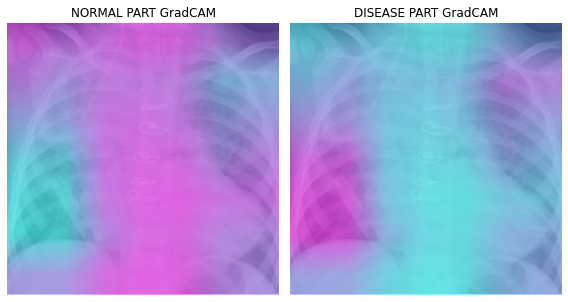

In [51]:
fig, (ax1,ax2) = plt.subplots(1,2) 
dls.train.decode((x,))[0].squeeze().show(ax=ax1)
ax1.imshow(-cam_gradcam.squeeze(),alpha=0.5,extent=(0,224,224,0),interpolation='bilinear',cmap='cool')
ax1.set_title("NORMAL PART GradCAM")
#
dls.train.decode((x,))[0].squeeze().show(ax=ax2)
ax2.imshow(cam_gradcam.squeeze(),alpha=0.5,extent=(0,224,224,0),interpolation='bilinear',cmap='cool')
ax2.set_title("DISEASE PART GradCAM")
#
fig.set_figwidth(8)            
fig.set_figheight(8)
fig.tight_layout()

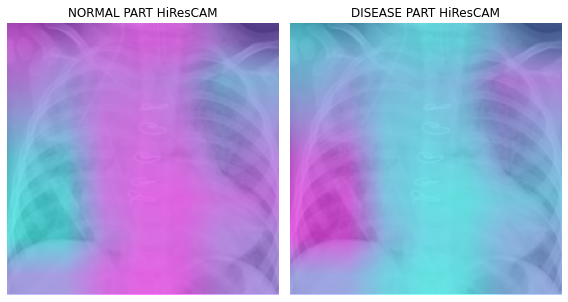

In [52]:
fig, (ax1,ax2) = plt.subplots(1,2) 
dls.train.decode((x,))[0].squeeze().show(ax=ax1)
ax1.imshow(-cam_hirescam.squeeze(),alpha=0.5,extent=(0,224,224,0),interpolation='bilinear',cmap='cool')
ax1.set_title("NORMAL PART HiResCAM")
#
dls.train.decode((x,))[0].squeeze().show(ax=ax2)
ax2.imshow(cam_hirescam.squeeze(),alpha=0.5,extent=(0,224,224,0),interpolation='bilinear',cmap='cool')
ax2.set_title("DISEASE PART HiResCAM")
#
fig.set_figwidth(8)            
fig.set_figheight(8)
fig.tight_layout()

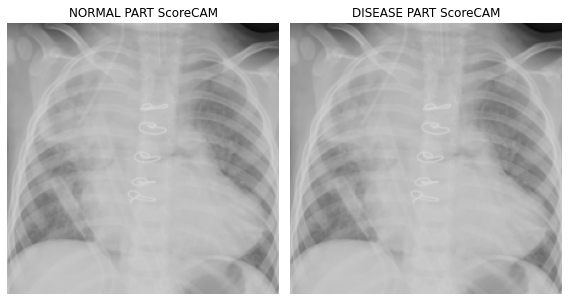

In [53]:
fig, (ax1,ax2) = plt.subplots(1,2) 
dls.train.decode((x,))[0].squeeze().show(ax=ax1)
ax1.imshow(-cam_scorecam.squeeze(),alpha=0.5,extent=(0,224,224,0),interpolation='bilinear',cmap='cool')
ax1.set_title("NORMAL PART ScoreCAM")
#
dls.train.decode((x,))[0].squeeze().show(ax=ax2)
ax2.imshow(cam_scorecam.squeeze(),alpha=0.5,extent=(0,224,224,0),interpolation='bilinear',cmap='cool')
ax2.set_title("DISEASE PART ScoreCAM")
#
fig.set_figwidth(8)            
fig.set_figheight(8)
fig.tight_layout()

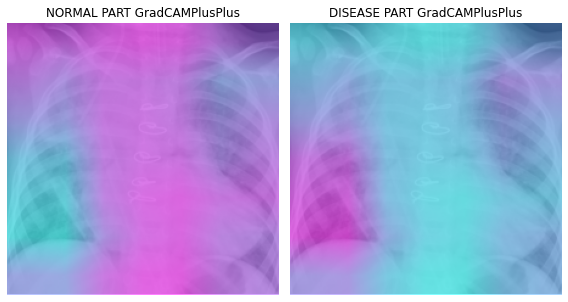

In [54]:
fig, (ax1,ax2) = plt.subplots(1,2) 
dls.train.decode((x,))[0].squeeze().show(ax=ax1)
ax1.imshow(-cam_gradcamplusplus.squeeze(),alpha=0.5,extent=(0,224,224,0),interpolation='bilinear',cmap='cool')
ax1.set_title("NORMAL PART GradCAMPlusPlus")
#
dls.train.decode((x,))[0].squeeze().show(ax=ax2)
ax2.imshow(cam_gradcamplusplus.squeeze(),alpha=0.5,extent=(0,224,224,0),interpolation='bilinear',cmap='cool')
ax2.set_title("DISEASE PART GradCAMPlusPlus")
#
fig.set_figwidth(8)            
fig.set_figheight(8)
fig.tight_layout()

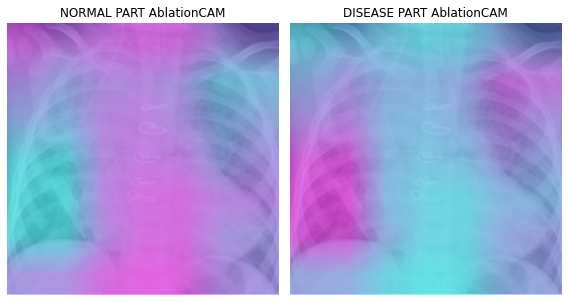

In [55]:
fig, (ax1,ax2) = plt.subplots(1,2) 
dls.train.decode((x,))[0].squeeze().show(ax=ax1)
ax1.imshow(-cam_ablationcam.squeeze(),alpha=0.5,extent=(0,224,224,0),interpolation='bilinear',cmap='cool')
ax1.set_title("NORMAL PART AblationCAM")
#
dls.train.decode((x,))[0].squeeze().show(ax=ax2)
ax2.imshow(cam_ablationcam.squeeze(),alpha=0.5,extent=(0,224,224,0),interpolation='bilinear',cmap='cool')
ax2.set_title("DISEASE PART AblationCAM")
#
fig.set_figwidth(8)            
fig.set_figheight(8)
fig.tight_layout()

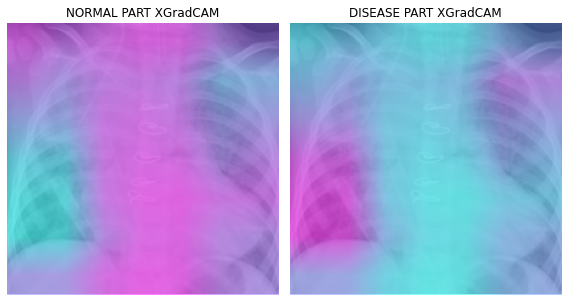

In [56]:
fig, (ax1,ax2) = plt.subplots(1,2) 
dls.train.decode((x,))[0].squeeze().show(ax=ax1)
ax1.imshow(-cam_xgradcam.squeeze(),alpha=0.5,extent=(0,224,224,0),interpolation='bilinear',cmap='cool')
ax1.set_title("NORMAL PART XGradCAM")
#
dls.train.decode((x,))[0].squeeze().show(ax=ax2)
ax2.imshow(cam_xgradcam.squeeze(),alpha=0.5,extent=(0,224,224,0),interpolation='bilinear',cmap='cool')
ax2.set_title("DISEASE PART XGradCAM")
#
fig.set_figwidth(8)            
fig.set_figheight(8)
fig.tight_layout()

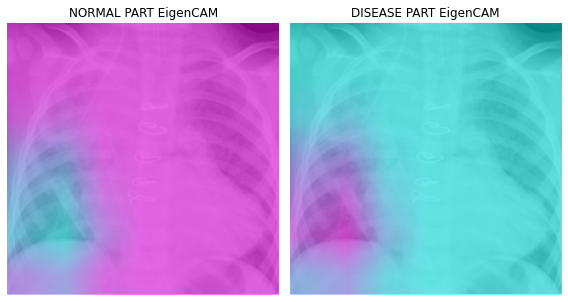

In [57]:
fig, (ax1,ax2) = plt.subplots(1,2) 
dls.train.decode((x,))[0].squeeze().show(ax=ax1)
ax1.imshow(-cam_eigencam.squeeze(),alpha=0.5,extent=(0,224,224,0),interpolation='bilinear',cmap='cool')
ax1.set_title("NORMAL PART EigenCAM")
#
dls.train.decode((x,))[0].squeeze().show(ax=ax2)
ax2.imshow(cam_eigencam.squeeze(),alpha=0.5,extent=(0,224,224,0),interpolation='bilinear',cmap='cool')
ax2.set_title("DISEASE PART EigenCAM")
#
fig.set_figwidth(8)            
fig.set_figheight(8)
fig.tight_layout()

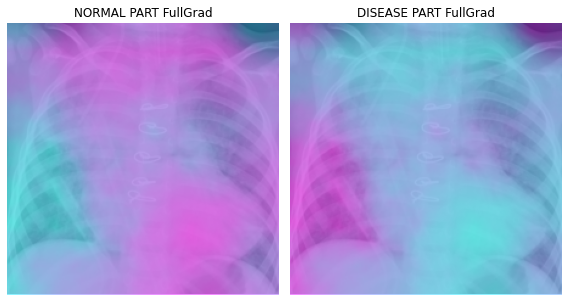

In [58]:
fig, (ax1,ax2) = plt.subplots(1,2) 
dls.train.decode((x,))[0].squeeze().show(ax=ax1)
ax1.imshow(-cam_fullgrad.squeeze(),alpha=0.5,extent=(0,224,224,0),interpolation='bilinear',cmap='cool')
ax1.set_title("NORMAL PART FullGrad")
#
dls.train.decode((x,))[0].squeeze().show(ax=ax2)
ax2.imshow(cam_fullgrad.squeeze(),alpha=0.5,extent=(0,224,224,0),interpolation='bilinear',cmap='cool')
ax2.set_title("DISEASE PART FullGrad")
#
fig.set_figwidth(8)            
fig.set_figheight(8)
fig.tight_layout()

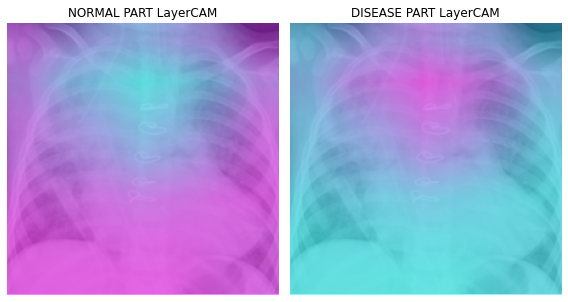

In [59]:
fig, (ax1,ax2) = plt.subplots(1,2) 
dls.train.decode((x,))[0].squeeze().show(ax=ax1)
ax1.imshow(-cam_layercam.squeeze(),alpha=0.5,extent=(0,224,224,0),interpolation='bilinear',cmap='cool')
ax1.set_title("NORMAL PART LayerCAM")
#
dls.train.decode((x,))[0].squeeze().show(ax=ax2)
ax2.imshow(cam_layercam.squeeze(),alpha=0.5,extent=(0,224,224,0),interpolation='bilinear',cmap='cool')
ax2.set_title("DISEASE PART LayerCAM")
#
fig.set_figwidth(8)            
fig.set_figheight(8)
fig.tight_layout()

# 3번째 시도

In [60]:
img = PILImage.create(get_image_files(path)[3107])

In [61]:
x, = first(dls.test_dl([img]))  #이미지 텐서화
x=x.to('cpu')

In [62]:
cam_gradcam = gradcam(input_tensor=x,targets=None)

In [63]:
cam_hirescam = hirescam(input_tensor=x,targets=None)

In [64]:
cam_scorecam = scorecam(input_tensor=x,targets=None)

100%|██████████| 32/32 [00:03<00:00,  9.22it/s]

In [65]:
cam_gradcamplusplus = gradcamplusplus(input_tensor=x,targets=None)

In [66]:
cam_ablationcam = ablationcam(input_tensor=x,targets=None)

100%|██████████| 16/16 [00:03<00:00,  4.23it/s]

In [67]:
cam_xgradcam = xgradcam(input_tensor=x,targets=None)

In [68]:
cam_eigencam = eigencam(input_tensor=x,targets=None)

In [69]:
cam_fullgrad = fullgrad(input_tensor=x,targets=None)

In [70]:
cam_eigengradcam = eigengradcam(input_tensor=x,targets=None)

In [71]:
cam_cat_layercam = layercam(input_tensor=x,targets=None)

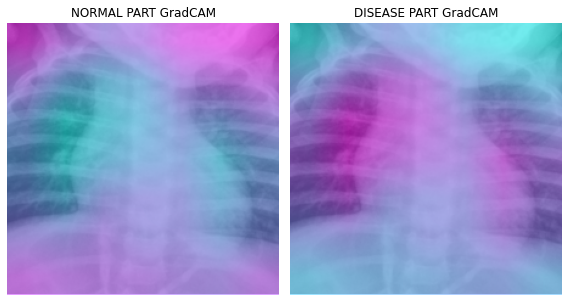

In [72]:
fig, (ax1,ax2) = plt.subplots(1,2) 
dls.train.decode((x,))[0].squeeze().show(ax=ax1)
ax1.imshow(-cam_gradcam.squeeze(),alpha=0.5,extent=(0,224,224,0),interpolation='bilinear',cmap='cool')
ax1.set_title("NORMAL PART GradCAM")
#
dls.train.decode((x,))[0].squeeze().show(ax=ax2)
ax2.imshow(cam_gradcam.squeeze(),alpha=0.5,extent=(0,224,224,0),interpolation='bilinear',cmap='cool')
ax2.set_title("DISEASE PART GradCAM")
#
fig.set_figwidth(8)            
fig.set_figheight(8)
fig.tight_layout()

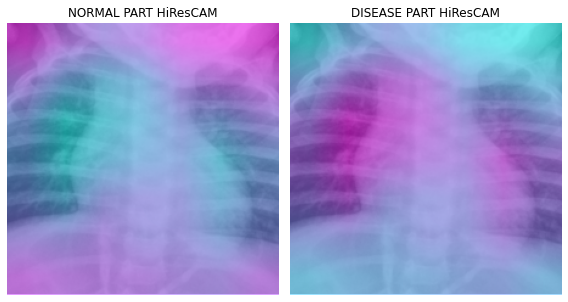

In [73]:
fig, (ax1,ax2) = plt.subplots(1,2) 
dls.train.decode((x,))[0].squeeze().show(ax=ax1)
ax1.imshow(-cam_hirescam.squeeze(),alpha=0.5,extent=(0,224,224,0),interpolation='bilinear',cmap='cool')
ax1.set_title("NORMAL PART HiResCAM")
#
dls.train.decode((x,))[0].squeeze().show(ax=ax2)
ax2.imshow(cam_hirescam.squeeze(),alpha=0.5,extent=(0,224,224,0),interpolation='bilinear',cmap='cool')
ax2.set_title("DISEASE PART HiResCAM")
#
fig.set_figwidth(8)            
fig.set_figheight(8)
fig.tight_layout()

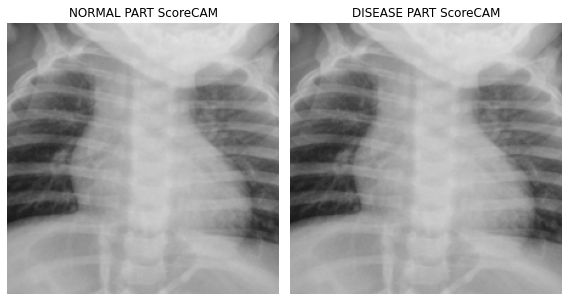

In [74]:
fig, (ax1,ax2) = plt.subplots(1,2) 
dls.train.decode((x,))[0].squeeze().show(ax=ax1)
ax1.imshow(-cam_scorecam.squeeze(),alpha=0.5,extent=(0,224,224,0),interpolation='bilinear',cmap='cool')
ax1.set_title("NORMAL PART ScoreCAM")
#
dls.train.decode((x,))[0].squeeze().show(ax=ax2)
ax2.imshow(cam_scorecam.squeeze(),alpha=0.5,extent=(0,224,224,0),interpolation='bilinear',cmap='cool')
ax2.set_title("DISEASE PART ScoreCAM")
#
fig.set_figwidth(8)            
fig.set_figheight(8)
fig.tight_layout()

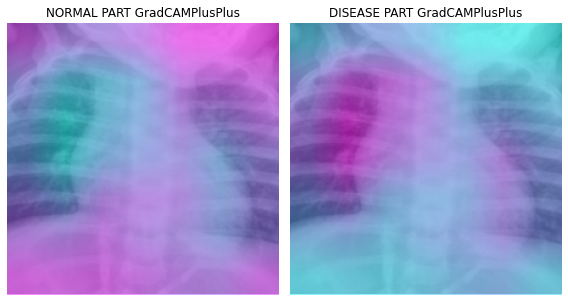

In [75]:
fig, (ax1,ax2) = plt.subplots(1,2) 
dls.train.decode((x,))[0].squeeze().show(ax=ax1)
ax1.imshow(-cam_gradcamplusplus.squeeze(),alpha=0.5,extent=(0,224,224,0),interpolation='bilinear',cmap='cool')
ax1.set_title("NORMAL PART GradCAMPlusPlus")
#
dls.train.decode((x,))[0].squeeze().show(ax=ax2)
ax2.imshow(cam_gradcamplusplus.squeeze(),alpha=0.5,extent=(0,224,224,0),interpolation='bilinear',cmap='cool')
ax2.set_title("DISEASE PART GradCAMPlusPlus")
#
fig.set_figwidth(8)            
fig.set_figheight(8)
fig.tight_layout()

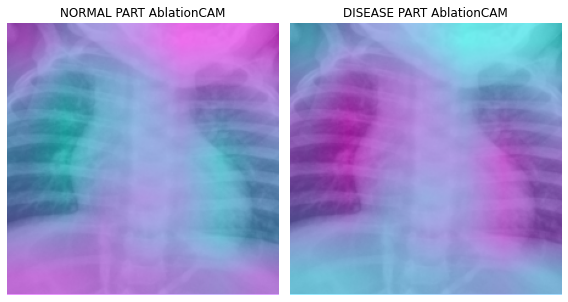

In [76]:
fig, (ax1,ax2) = plt.subplots(1,2) 
dls.train.decode((x,))[0].squeeze().show(ax=ax1)
ax1.imshow(-cam_ablationcam.squeeze(),alpha=0.5,extent=(0,224,224,0),interpolation='bilinear',cmap='cool')
ax1.set_title("NORMAL PART AblationCAM")
#
dls.train.decode((x,))[0].squeeze().show(ax=ax2)
ax2.imshow(cam_ablationcam.squeeze(),alpha=0.5,extent=(0,224,224,0),interpolation='bilinear',cmap='cool')
ax2.set_title("DISEASE PART AblationCAM")
#
fig.set_figwidth(8)            
fig.set_figheight(8)
fig.tight_layout()

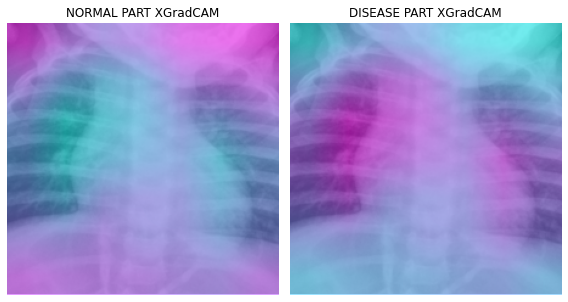

In [77]:
fig, (ax1,ax2) = plt.subplots(1,2) 
dls.train.decode((x,))[0].squeeze().show(ax=ax1)
ax1.imshow(-cam_xgradcam.squeeze(),alpha=0.5,extent=(0,224,224,0),interpolation='bilinear',cmap='cool')
ax1.set_title("NORMAL PART XGradCAM")
#
dls.train.decode((x,))[0].squeeze().show(ax=ax2)
ax2.imshow(cam_xgradcam.squeeze(),alpha=0.5,extent=(0,224,224,0),interpolation='bilinear',cmap='cool')
ax2.set_title("DISEASE PART XGradCAM")
#
fig.set_figwidth(8)            
fig.set_figheight(8)
fig.tight_layout()

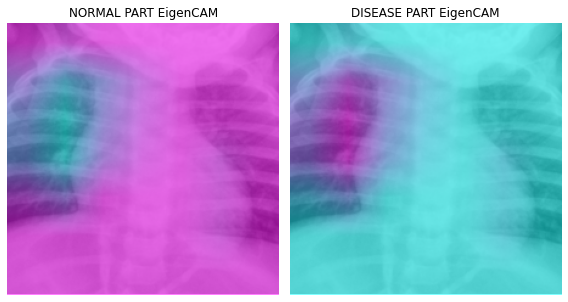

In [78]:
fig, (ax1,ax2) = plt.subplots(1,2) 
dls.train.decode((x,))[0].squeeze().show(ax=ax1)
ax1.imshow(-cam_eigencam.squeeze(),alpha=0.5,extent=(0,224,224,0),interpolation='bilinear',cmap='cool')
ax1.set_title("NORMAL PART EigenCAM")
#
dls.train.decode((x,))[0].squeeze().show(ax=ax2)
ax2.imshow(cam_eigencam.squeeze(),alpha=0.5,extent=(0,224,224,0),interpolation='bilinear',cmap='cool')
ax2.set_title("DISEASE PART EigenCAM")
#
fig.set_figwidth(8)            
fig.set_figheight(8)
fig.tight_layout()

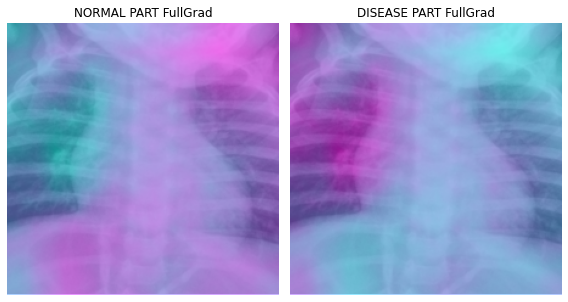

In [79]:
fig, (ax1,ax2) = plt.subplots(1,2) 
dls.train.decode((x,))[0].squeeze().show(ax=ax1)
ax1.imshow(-cam_fullgrad.squeeze(),alpha=0.5,extent=(0,224,224,0),interpolation='bilinear',cmap='cool')
ax1.set_title("NORMAL PART FullGrad")
#
dls.train.decode((x,))[0].squeeze().show(ax=ax2)
ax2.imshow(cam_fullgrad.squeeze(),alpha=0.5,extent=(0,224,224,0),interpolation='bilinear',cmap='cool')
ax2.set_title("DISEASE PART FullGrad")
#
fig.set_figwidth(8)            
fig.set_figheight(8)
fig.tight_layout()

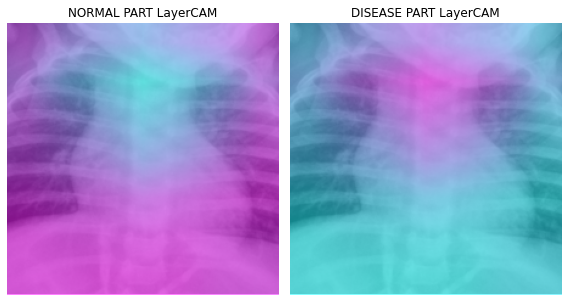

In [80]:
fig, (ax1,ax2) = plt.subplots(1,2) 
dls.train.decode((x,))[0].squeeze().show(ax=ax1)
ax1.imshow(-cam_layercam.squeeze(),alpha=0.5,extent=(0,224,224,0),interpolation='bilinear',cmap='cool')
ax1.set_title("NORMAL PART LayerCAM")
#
dls.train.decode((x,))[0].squeeze().show(ax=ax2)
ax2.imshow(cam_layercam.squeeze(),alpha=0.5,extent=(0,224,224,0),interpolation='bilinear',cmap='cool')
ax2.set_title("DISEASE PART LayerCAM")
#
fig.set_figwidth(8)            
fig.set_figheight(8)
fig.tight_layout()